In [12]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "0"
os.environ["DDE_BACKEND"] = 'pytorch'
import deepxde as dde
import numpy as np

In [13]:
geom = dde.geometry.TimeDomain(0, 10)

In [14]:
def ode_system(x, y):
    y1, y2 = y[:, 0:1], y[:, 1:]
    dy1_x = dde.grad.jacobian(y, x, i=0)
    dy2_x = dde.grad.jacobian(y, x, i=1)
    return [dy1_x - y2, dy2_x + y1]

In [15]:
def boundary(_, on_initial):
    return on_initial

In [16]:
ic1 = dde.icbc.IC(geom, lambda x: 0, boundary, component=0)
ic2 = dde.icbc.IC(geom, lambda x: 1, boundary, component=1)

In [17]:
def func(x):
    return np.hstack((np.sin(x), np.cos(x)))

In [18]:
data = dde.data.PDE(geom, ode_system, [ic1, ic2], 35, 2, solution=func, num_test=100)

In [19]:
layer_size = [1] + [50]*3 + [2]
activation = 'tanh'
initializer = 'Glorot uniform'
net = dde.nn.FNN(layer_size, activation, initializer)

In [20]:
model = dde.Model(data, net)
model.compile('adam', lr=0.001, metrics=['l2 relative error'])

Compiling model...
'compile' took 0.000435 s



In [21]:
losshistory, train_state = model.train(iterations=20000)

Training model...

Step      Train loss                                  Test loss                                   Test metric   
0         [1.75e-01, 3.33e-02, 0.00e+00, 1.00e+00]    [1.79e-01, 3.39e-02, 0.00e+00, 1.00e+00]    [1.04e+00]    
1000      [8.36e-03, 7.17e-03, 4.09e-08, 3.02e-04]    [9.48e-03, 7.14e-03, 4.09e-08, 3.02e-04]    [7.80e-01]    
2000      [6.29e-03, 4.68e-03, 3.10e-07, 1.50e-04]    [6.65e-03, 4.91e-03, 3.10e-07, 1.50e-04]    [6.56e-01]    
3000      [3.92e-03, 3.98e-03, 9.56e-07, 8.63e-05]    [4.10e-03, 4.19e-03, 9.56e-07, 8.63e-05]    [5.33e-01]    
4000      [1.67e-03, 2.36e-03, 3.20e-06, 1.85e-05]    [1.77e-03, 2.09e-03, 3.20e-06, 1.85e-05]    [3.32e-01]    
5000      [3.62e-04, 7.11e-04, 7.29e-07, 5.07e-06]    [3.98e-04, 5.50e-04, 7.29e-07, 5.07e-06]    [1.42e-01]    
6000      [6.91e-05, 8.33e-05, 7.09e-08, 2.45e-07]    [6.57e-05, 5.16e-05, 7.09e-08, 2.45e-07]    [3.39e-02]    
7000      [4.10e-05, 1.27e-05, 1.76e-08, 6.88e-10]    [3.62e-05, 6.51e-06, 1.

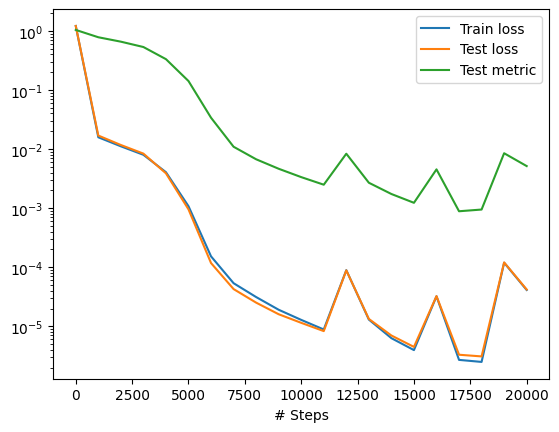

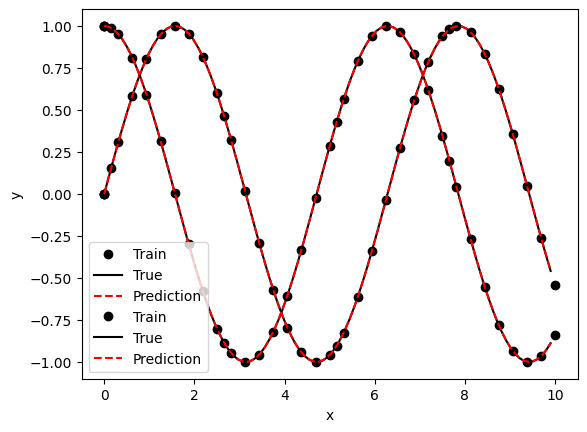

In [23]:
dde.saveplot(losshistory, train_state, issave=False, isplot=True)